In [124]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
import pyarrow as pa
import pyarrow.parquet as pq

In [125]:
# Configuration
price_threshold = 2.0
RANDOM_STATE = 1234
input_filename = os.path.join(os.getcwd(), "data", "airbnb_readytofit.csv.gz")

### Load the Data

In [126]:
df = pd.read_csv(input_filename, header=0,
                  dtype_backend='pyarrow',
                  engine='pyarrow')

# Reducing Data Leakage

In [127]:
# removing columns that have high correlation with each other
# any column with a corr of > 0.83
# items to delete
data_leakage_cols = ['host_total_listings_count', 'minimum_nights_avg_ntm', 'availability_90', 'minimum_nights', 'availability_60', 'maximum_nights_avg_ntm', 'calculated_host_listings_count']

# df.drop(columns=data_leakage_cols, inplace=True)

# other potential columns to remove due to data leakage
# room_type_Entire home/apt;room_type_Private room
# review_scores_rating;review_scores_value
# review_scores_rating;review_scores_cleanliness
# review_scores_checkin;review_scores_communication
# accommodates;beds              
# bedrooms;beds                  
# review_scores_rating;review_scores_communication
# accommodates;bedrooms          
# number_of_reviews_ltm;number_of_reviews_l30d

In [128]:
# potential second approach: only keep the columns with very small correlation, like less than 0.3
#colmns_with_low_leakage = []

# Downsampling


-0.8893197164541438
6.00629692648552


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


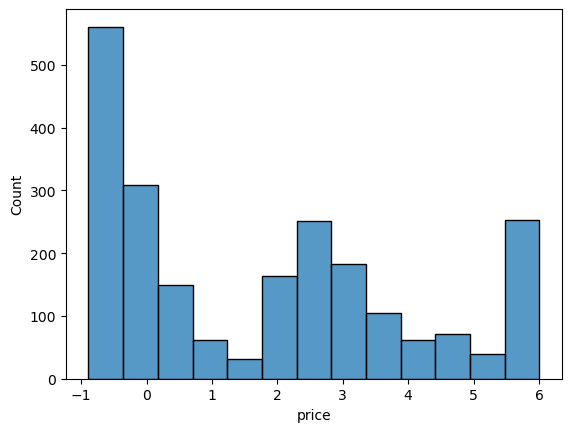

In [129]:
# downsampling
# https://wellsr.com/python/upsampling-and-downsampling-imbalanced-data-in-python/  # visit with NoScript, otherwise this runs a TON of adds covering the screen

low_price = df[df['price'] < price_threshold]
high_price  = df[df['price'] >= price_threshold]

low_price_downsampled = resample(low_price,
             replace=True,
             n_samples=len(high_price),
             random_state=RANDOM_STATE)

data_downsampled = pd.concat([low_price_downsampled, high_price])
sns.histplot(data=data_downsampled, x="price")

print(data_downsampled['price'].min())
print(data_downsampled['price'].max())

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


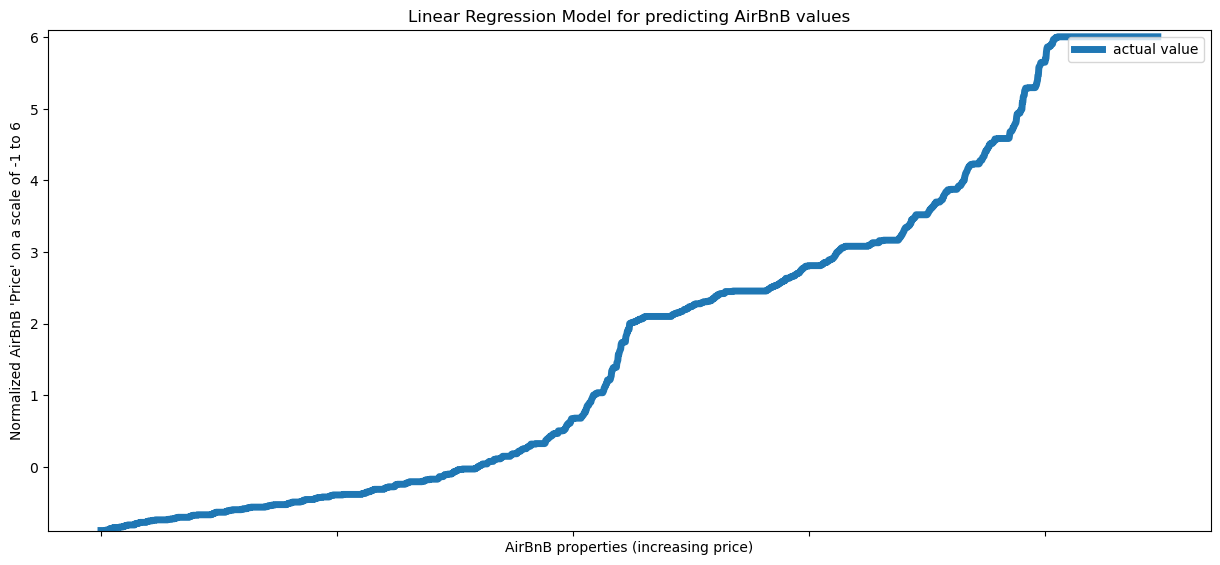

In [130]:
# make sure I didn't screw up the price range, view it.

fig = plt.figure(figsize=(15, 6.5))
ax = fig.add_subplot(111)

data_downsampled.sort_values(by='price', inplace=True)

y_values = data_downsampled['price']
x_values = np.arange(len(y_values))

sns.lineplot(x=x_values, y=y_values, linewidth=5,
                legend="full", label='actual value')

plt.title(f'Linear Regression Model for predicting AirBnB values')
plt.xlabel("AirBnB properties (increasing price)")
plt.ylabel("Normalized AirBnB 'Price' on a scale of -1 to 6")
plt.ylim([-0.89,6.1])
plt.xticks(visible=False)
plt.show()

# Upsampling

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

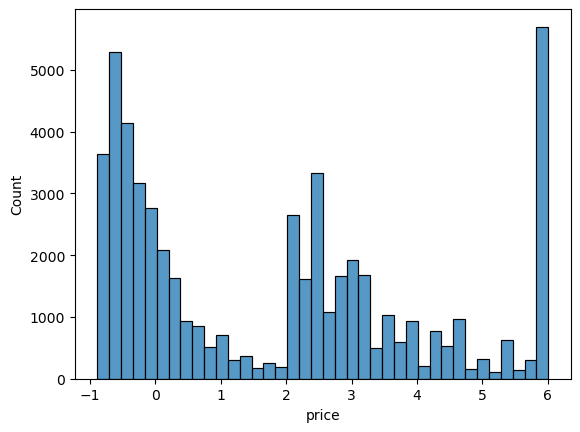

In [131]:
high_price_upsampled = resample(high_price,
             replace=True,
             n_samples=len(low_price),
             random_state=RANDOM_STATE)

data_upsampled = pd.concat([low_price, high_price_upsampled])
sns.histplot(data=data_upsampled, x="price")

# Storing new file

In [132]:
outfile = os.path.splitext(input_filename)[0] + "_downsampled.csv"
data_downsampled.to_csv(outfile, index=False)
print(f'Data saved to new CSV file:\n{outfile}')

Data saved to new CSV file:
/Users/the-molecular-man/source_code/portfolio_examples/python/predicting_airbnb_prices/data/airbnb_readytofit.csv_downsampled.csv


In [133]:
outfile = os.path.splitext(input_filename)[0] + "_upsampled.csv"
data_upsampled.to_csv(outfile, index=False)
print(f'Data saved to new CSV file:\n{outfile}')

Data saved to new CSV file:
/Users/the-molecular-man/source_code/portfolio_examples/python/predicting_airbnb_prices/data/airbnb_readytofit.csv_upsampled.csv
